In [99]:
# Import Libriaries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# Read the CSV file

unicorn_companies = pd.read_csv(r'C:\Users\KOLEDAFE\Desktop\Data Analysis Course\Phython\Unicorn_Companies.csv')
unicorn_companies

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


In [24]:
# Data Shape

unicorn_companies.shape

(1074, 10)

In [25]:
# Data Size

unicorn_companies.size

10740

## Checking of Data and Cleaning

In [26]:
# Data Information

unicorn_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [27]:
# Checking for missing values

unicorn_companies.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [68]:
# Define function for................
def convert_to_number(x):
    if x[-1] == 'M':
        return float(x[:-1])*1e6
    elif x [-1] == 'B':
        return float (x[:-1])*1e9
    else:
        return x
    
# convert the valuation column to float
unicorn_companies['Valuation'] = unicorn_companies['Valuation'].astype(str).str.replace('$', '').apply(convert_to_number).astype(float)


# Print Updated DataFrame
unicorn_companies.head()

C:\Users\KOLEDAFE\AppData\Local\Temp\ipykernel_24100\1151968183.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  unicorn_companies['Valuation'] = unicorn_companies['Valuation'].astype(str).str.replace('$', '').apply(convert_to_number).astype(float)


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."


In [69]:
unicorn_companies.dtypes

Company              object
Valuation           float64
Date Joined          object
Industry             object
City                 object
Country              object
Continent            object
Year Founded          int64
Funding             float64
Select Investors     object
dtype: object

In [70]:
# Convert Date join to Datetime

unicorn_companies['Date Joined'] = pd.to_datetime(unicorn_companies['Date Joined'])

# Convert the Year Founded to datetime as well
unicorn_companies['Year Founded'] = pd.to_datetime(unicorn_companies['Year Founded'], format = '%Y')

In [71]:
unicorn_companies.dtypes

Company                     object
Valuation                  float64
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country                     object
Continent                   object
Year Founded        datetime64[ns]
Funding                    float64
Select Investors            object
dtype: object

In [72]:
# Calculate the age of the company at the time it joined the unicorn companies

unicorn_companies['Age of Joining'] = ((unicorn_companies['Date Joined'] - unicorn_companies['Year Founded']).dt.days /365).round(1)

unicorn_companies.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of Joining
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.3
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.5
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9


In [73]:
# Addressing the missing value using forward fill method to the 'CITY' and 'SELECTED INVESTORS'

unicorn_companies['City'] = unicorn_companies['City'].ffill()
unicorn_companies['Select Investors'] = unicorn_companies['Select Investors'].ffill

unicorn_companies.head

<bound method NDFrame.head of           Company     Valuation Date Joined                         Industry  \
0       Bytedance  1.800000e+11  2017-04-07          Artificial intelligence   
1          SpaceX  1.000000e+11  2012-12-01                            Other   
2           SHEIN  1.000000e+11  2018-07-03  E-commerce & direct-to-consumer   
3          Stripe  9.500000e+10  2014-01-23                          Fintech   
4          Klarna  4.600000e+10  2011-12-12                          Fintech   
...           ...           ...         ...                              ...   
1069     Zhaogang  1.000000e+09  2017-06-29  E-commerce & direct-to-consumer   
1070  Zhuan Zhuan  1.000000e+09  2017-04-18  E-commerce & direct-to-consumer   
1071     Zihaiguo  1.000000e+09  2021-05-06                Consumer & retail   
1072         Zopa  1.000000e+09  2021-10-19                          Fintech   
1073        Zwift  1.000000e+09  2020-09-16  E-commerce & direct-to-consumer   

         

In [74]:
unicorn_companies.isnull().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
Age of Joining      0
dtype: int64

## No more missing value. The data set is finally clean.

-- Unto Data Manipulation

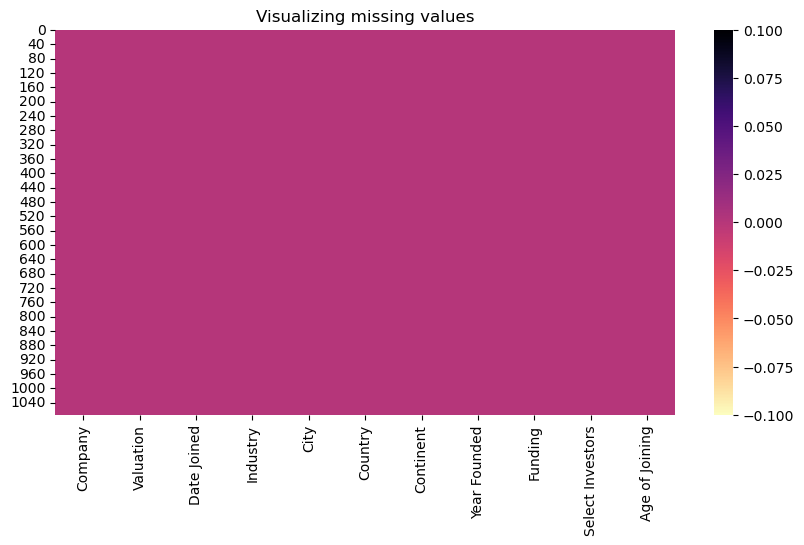

In [75]:
#Visualization

plt.figure(figsize = (10,5))
plt.title('Visualizing missing values')
sns.heatmap(unicorn_companies.isnull(), cbar = True, cmap = 'magma_r')
plt.show()

## Visualiization, Observation & Analysis

In [76]:
unicorn_companies.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors',
       'Age of Joining'],
      dtype='object')

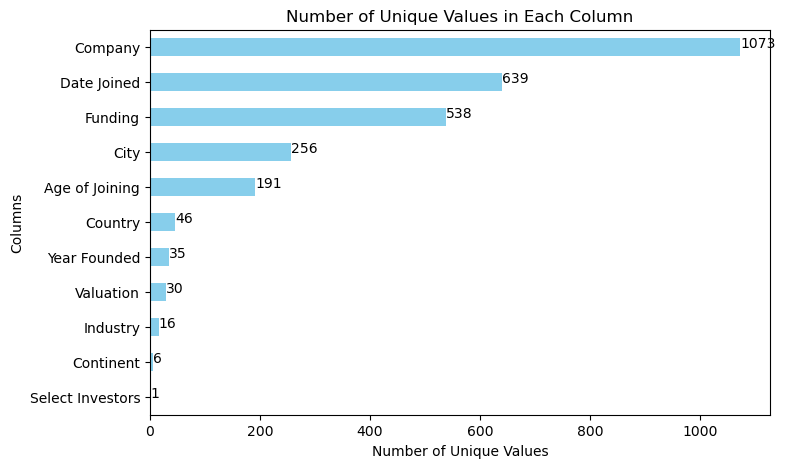

In [84]:
# Count the number of unique values in each column and sort by ascending count
column_value_counts = unicorn_companies.nunique().sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(8, 5))
bar_plot = column_value_counts.plot(kind='barh', color='skyblue')

# Adding data labels to the bars
for index, value in enumerate(column_value_counts):
    plt.text(value, index, str(value))

plt.xlabel('Number of Unique Values')
plt.ylabel('Columns')
plt.title('Number of Unique Values in Each Column')
plt.show()

## Observation

- The chart above display the the unique values in each colomn against their values with an obvious display of company at the top of the chart while Selected Investors beneath.

In [83]:
unicorn_companies['Company'].value_counts()


Bolt               2
Bytedance          1
Yidian Zixun       1
Klook              1
Epirus             1
                  ..
eDaili             1
ENOVATE            1
Fenbi Education    1
Hesai Tech         1
Zwift              1
Name: Company, Length: 1073, dtype: int64

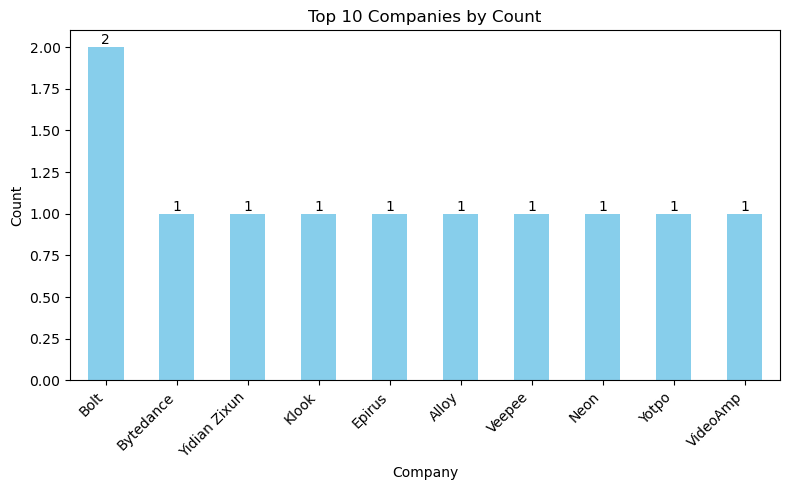

In [87]:
# Count the occurrences of each company
company_counts = unicorn_companies['Company'].value_counts()

# Choose the top N companies for visualization
top_n = 10  # Change this value to show a different number of companies
top_company_counts = company_counts.head(top_n)

# Create a bar chart
plt.figure(figsize=(8, 5))
bar_plot = top_company_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Top {} Companies by Count'.format(top_n))
plt.xticks(rotation=45, ha='right')

# Adding data labels to the bars
for index, value in enumerate(top_company_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Observation

- The above graph display the top 10 Companies and identifying Bolt at the top of the list.

In [91]:
#Bivariate analysis

# Summary statistics per location and price

unicorn_companies.groupby('Industry')['Funding'].describe().astype('int')

C:\Users\KOLEDAFE\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


,count,mean,std,min,25%,50%,75%,max
Industry,,,,,,,,
Artificial Intelligence,11,261545454,135139456,151000000,165500000,211000000,300000000,607000000
Artificial intelligence,73,601712328,1030127075,79000000,205000000,317000000,682000000,-2147483648
Auto & transportation,31,1131419354,1001400744,125000000,428500000,828000000,1000000000,-2147483648
Consumer & retail,25,1019680000,-2147483648,0,200000000,423000000,556000000,-2147483648
Cybersecurity,50,438640000,323388674,126000000,218500000,374000000,554750000,2000000000
Data management & analytics,41,438560975,464358807,0,237000000,346000000,475000000,-2147483648
E-commerce & direct-to-consumer,111,670603603,776273233,0,287500000,450000000,736500000,-2147483648
Edtech,28,781250000,1094787807,62000000,235750000,353500000,614500000,-2147483648
Fintech,224,482125000,457101172,0,218500000,368500000,590250000,-2147483648


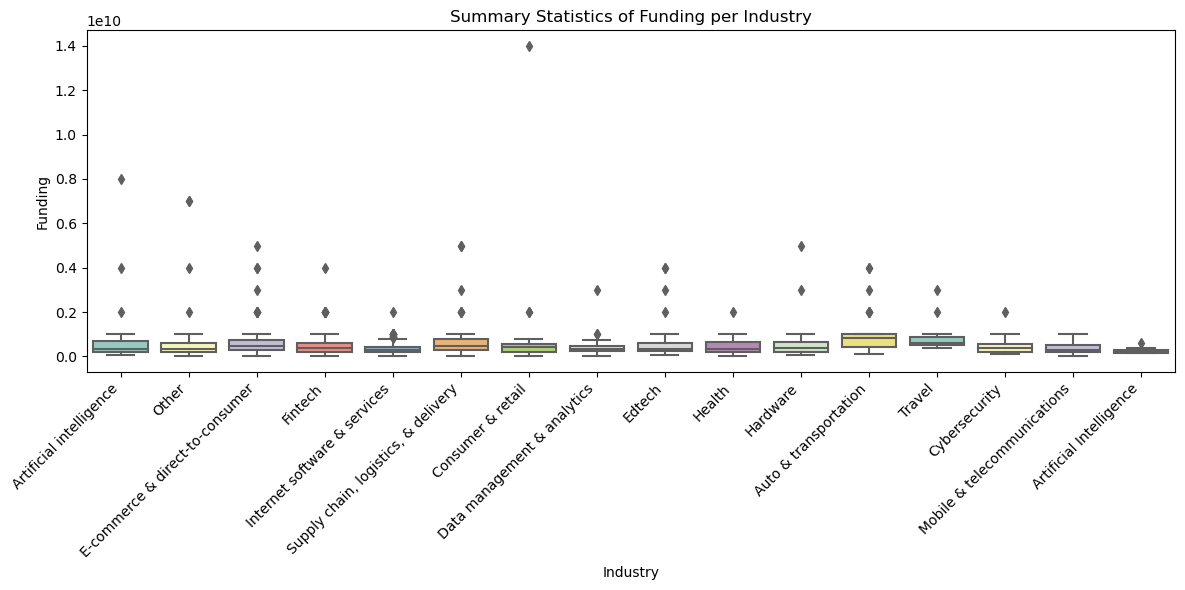

In [92]:
# Bivariate analysis: Summary statistics per industry and funding

plt.figure(figsize=(12, 6))
sns.boxplot(data=unicorn_companies, x='Industry', y='Funding', palette='Set3')
plt.xlabel('Industry')
plt.ylabel('Funding')
plt.title('Summary Statistics of Funding per Industry')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Observation

- The picture above illusterate the summary of statistical industerial funding with 'Auto and Transportation' is mostly funded while 'AI' is least funded

In [102]:
# Top 5 Funded Companies

top5_funds = unicorn_companies.groupby('Company')['Funding'].sum()[:5]
top5_funds

Company
1047 Games    1.270000e+08
1KMXC         8.600000e+07
1Password     9.200000e+08
4Paradigm     1.000000e+09
56PINGTAI     1.880000e+08
Name: Funding, dtype: float64

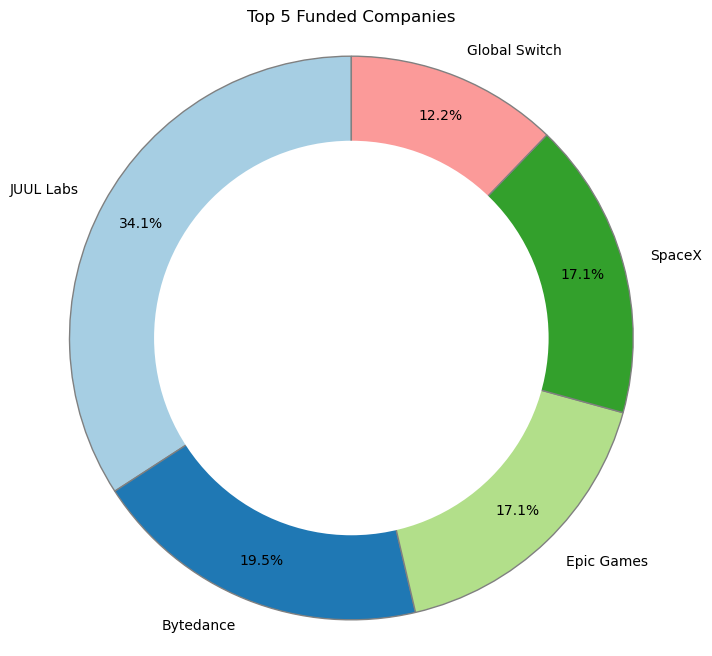

In [111]:
# Top 5 Funded Companies
top5_funds = unicorn_companies.groupby('Company')['Funding'].sum().sort_values(ascending=False)[:5]

# Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(top5_funds, labels=top5_funds.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'gray'})
plt.title('Top 5 Funded Companies')
center_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(center_circle)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Observation

The circulat chart above shows the top 5 most funded companies with JUUL Labs taking the largest share and leaving the Global Switch with the least share with 34.1% and 12.2% respectively among the selected companies.

C:\Users\KOLEDAFE\AppData\Local\Temp\ipykernel_24100\750795097.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_analysis = unicorn_companies[multi_analysis].corr()


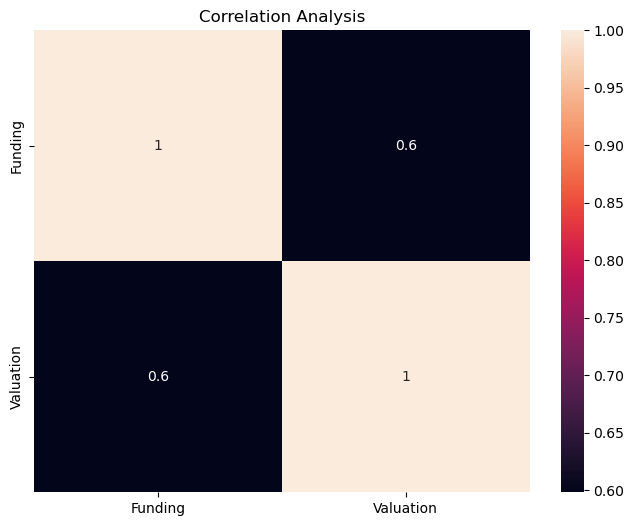

In [118]:
# Multi

multi_analysis = ['City','Funding', 'Continent', 'Valuation', 'Select Investors', 'Date Joined']

# Correlation

corr_analysis = unicorn_companies[multi_analysis].corr()

# Visualize

plt.figure(figsize = (8, 6))
sns.heatmap(corr_analysis, annot = True)
plt.title('Correlation Analysis')
plt.show()

## Observation

- Here is a correlation analysis of selected coloumns from the list above showing the correlation between funding and valuation to be 1 to 0.6 vice-versa

## Overall Recommendation

- In summary,the dataset explicitly indicate that funding into the companies and industries were majorly tilted to few ones while larger part of these were not properly funded which brought down their valuations.
        
        - Recommending that the stakeholders/selected investors should unanimously generalizec their investment such that every associated company and industry will experience adequate funding and in return brings presentable valuations.